In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import os
import pickle

from dotenv import find_dotenv, load_dotenv

In [2]:
load_dotenv(find_dotenv())
repo_dir = os.environ['REPO_DIR']
cal_img_dir = os.path.join(repo_dir, 'camera_cal')
data_dir = os.path.join(repo_dir, 'data')

In [3]:
def undistort_img(img_path, M, dist):
    """Un-distorts image on disk

    Args:
        img_path (str): Path to image to undistort

        M (numpy.array): Camera matrix (output from cv2.calibrateCamera())

        dist (numpy.array): Distortion coefficients (output from
                            cv2.calibrateCamera())

    Returns
        image: numpy.array representation of an image

    """
    return cv2.undistort(cv2.imread(img_path), M, dist, None, M)

In [4]:
with open(os.path.join(data_dir, 'calibration.p'), 'rb') as f:
    calibration = pickle.load(f)
    
M = calibration['M']
dist = calibration['dist']

In [5]:
chessboard_path = os.path.join(cal_img_dir, 'calibration1.jpg')
distorted_image = cv2.imread(chessboard_path)
undistorted_img = undistort_img(chessboard_path, M, dist)

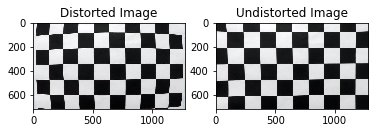

In [6]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(distorted_image)
axes[0].set_title('Distorted Image')
    
axes[1].imshow(undistorted_img)
axes[1].set_title('Undistorted Image')

In [7]:
help(axes[0].imshow)

Help on method imshow in module matplotlib.axes._axes:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` 